# Table of Contents

# 01. Importing Libraries

# 02. Importing Data

# 03. Subsetting, wrangling and cleaning time-series data

# 04. Plotting Separate Components

# 05. Testing for stationarity

# 06. Checking for autocorrelations

# 07. Stationarizing the Data

# 01. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

# 02. Importing Data

In [2]:
path = r'C:\Users\ketki\Desktop\Data Analytics bootcamp tasks\Data Immersion\Achievement 6'

In [4]:
quandl.ApiConfig.api_key = 'xqBRX2mXxEJDFda6Ti7B'

In [15]:
data = quandl.get('FRED/GDPPOT')

In [16]:
data.head()

,Value
Date,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


In [17]:
data.shape

(332, 1)

In [18]:
data.columns

Index(['Value'], dtype='object')

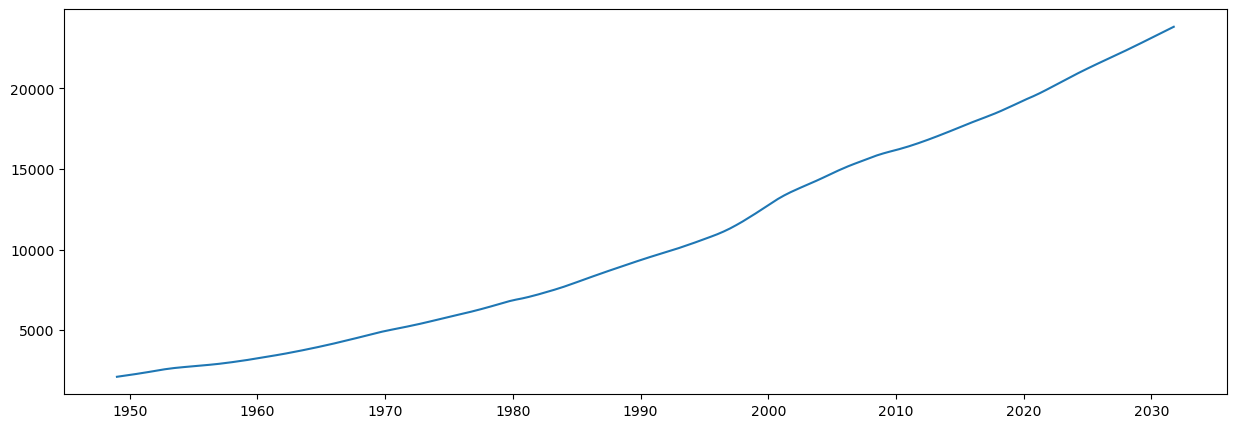

In [19]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

# 03. Subsetting, wrangling and cleaning time-series data

In [20]:
data_2 = data.reset_index()

In [21]:
data_2.head()

,Date,Value
0,1949-01-01,2102.982630
1,1949-04-01,2130.581305
2,1949-07-01,2159.340530
3,1949-10-01,2186.844859
4,1950-01-01,2216.058359


In [22]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [23]:
data_sub.shape

(162, 2)

In [24]:
data_sub.head()

,Date,Value
124,1980-01-01,6847.481683
125,1980-04-01,6890.146039
126,1980-07-01,6928.061362
127,1980-10-01,6968.010712
128,1981-01-01,7012.104757


In [25]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis = 1, inplace = True)
data_sub.head()

,Value
datetime,
1980-01-01,6847.481683
1980-04-01,6890.146039
1980-07-01,6928.061362
1980-10-01,6968.010712
1981-01-01,7012.104757


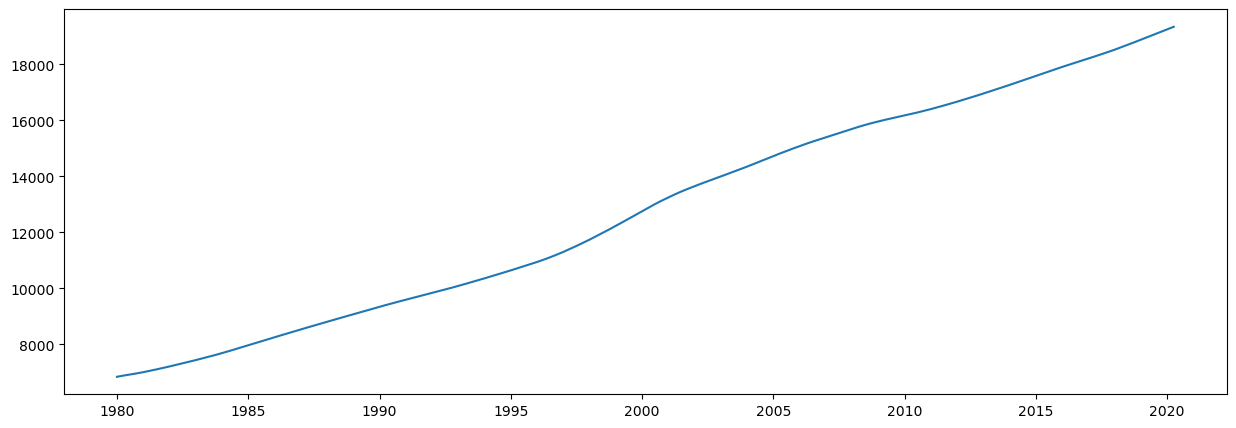

In [26]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [29]:
# checking for missing values

data_sub.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Value
datetime         
1980-01-01  False
1980-04-01  False
1980-07-01  False
1980-10-01  False
1981-01-01  False
...           ...
2019-04-01  False
2019-07-01  False
2019-10-01  False
2020-01-01  False
2020-04-01  False

[162 rows x 1 columns]>

In [28]:
dups = data_sub.duplicated()
dups.sum()

0

In [30]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model = 'additive')

# 04. Plotting Separate Components

In [31]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

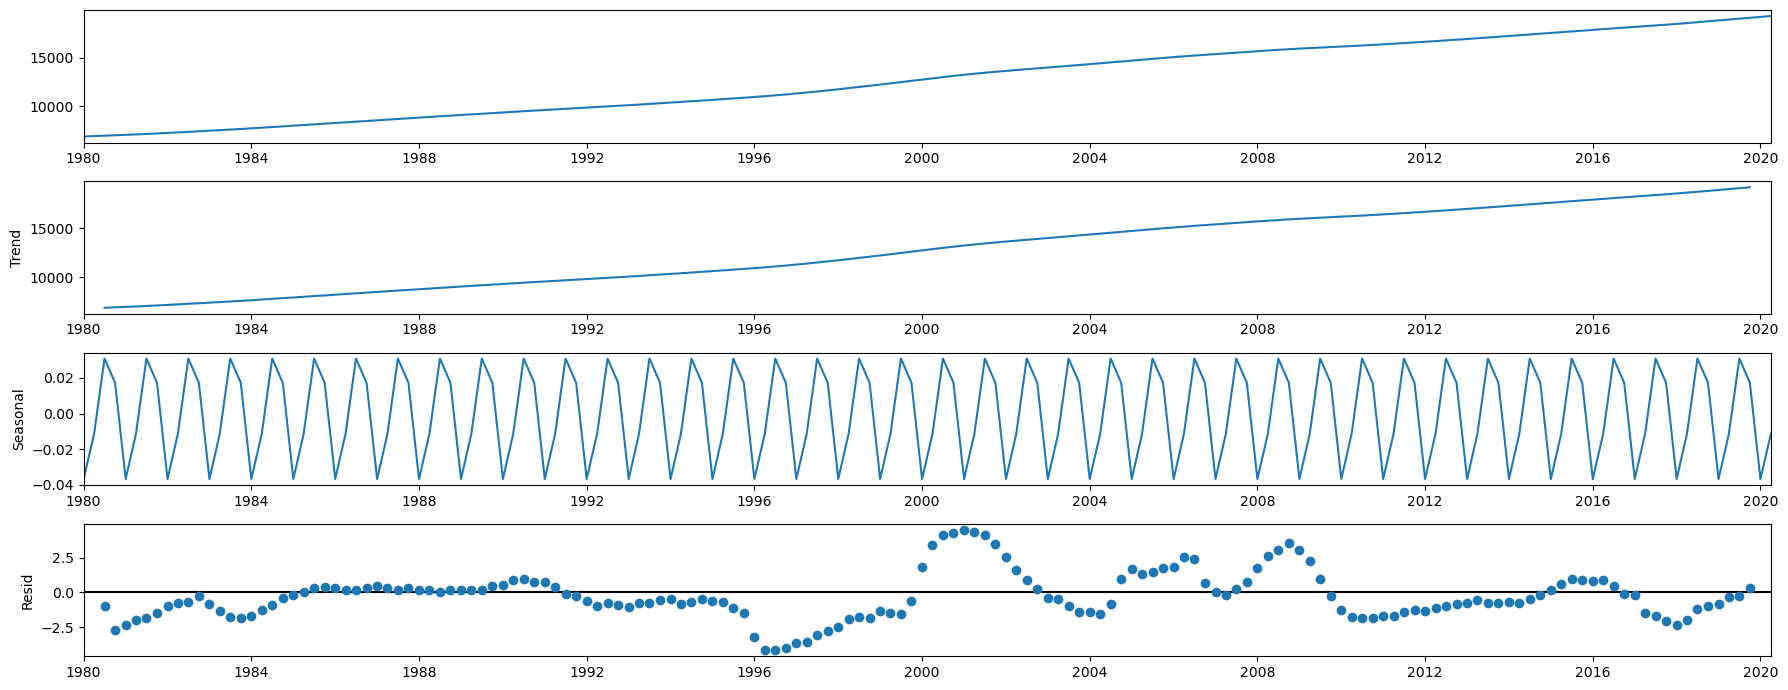

In [32]:
# plotting the separate components

decomposition.plot()
plt.show()

# 05. Testing for stationarity

In [33]:
# Testing for stationarity

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical value (%s)'%key] = value
    print (result)
    
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.137050
p-value                          0.945621
Number of Lags Used              5.000000
Number of Observations Used    156.000000
Critical value (1%)             -3.472979
Critical value (5%)             -2.880252
Critical value (10%)            -2.576747
dtype: float64


# 06. Checking for autocorrelations

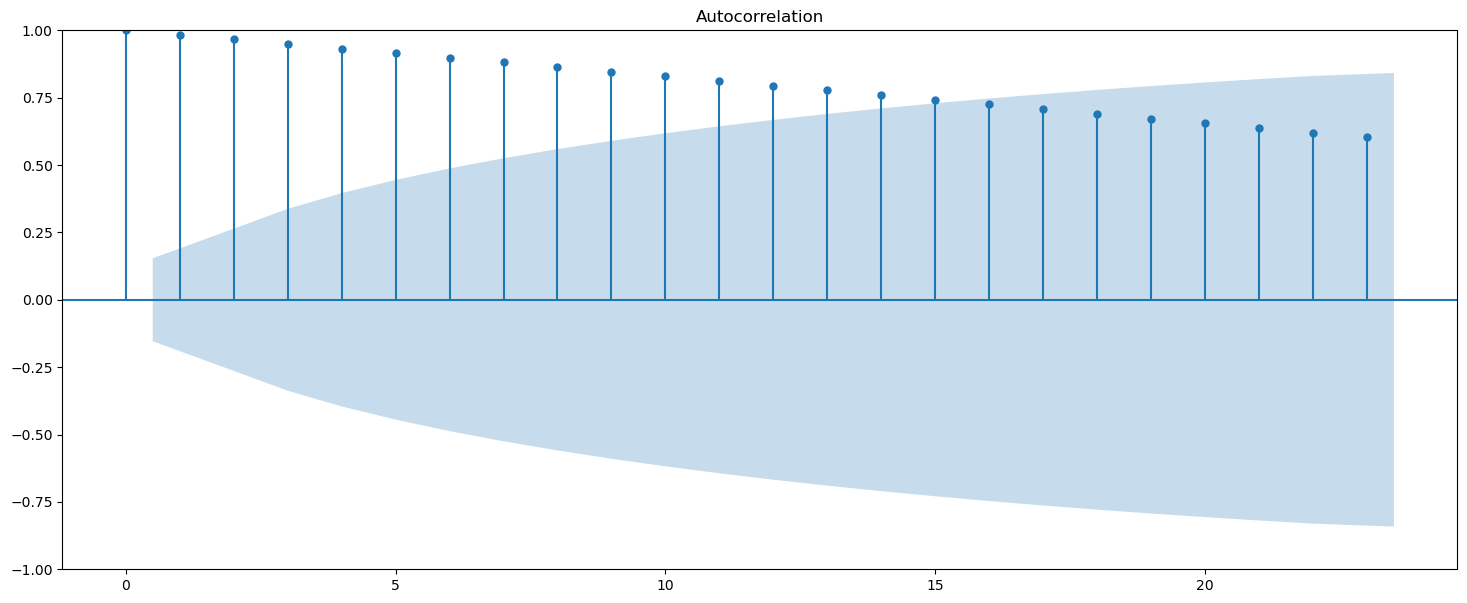

In [34]:
# checking plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()

# 07. Stationarizing the Federal Real Potential Gross Domestic Product data

In [35]:
data_diff = data_sub - data_sub.shift(1)

In [36]:
data_diff.dropna(inplace = True)

In [37]:
data_diff.head()

,Value
datetime,
1980-04-01,42.664356
1980-07-01,37.915323
1980-10-01,39.949350
1981-01-01,44.094045
1981-04-01,47.180044


In [38]:
data_diff.columns

Index(['Value'], dtype='object')

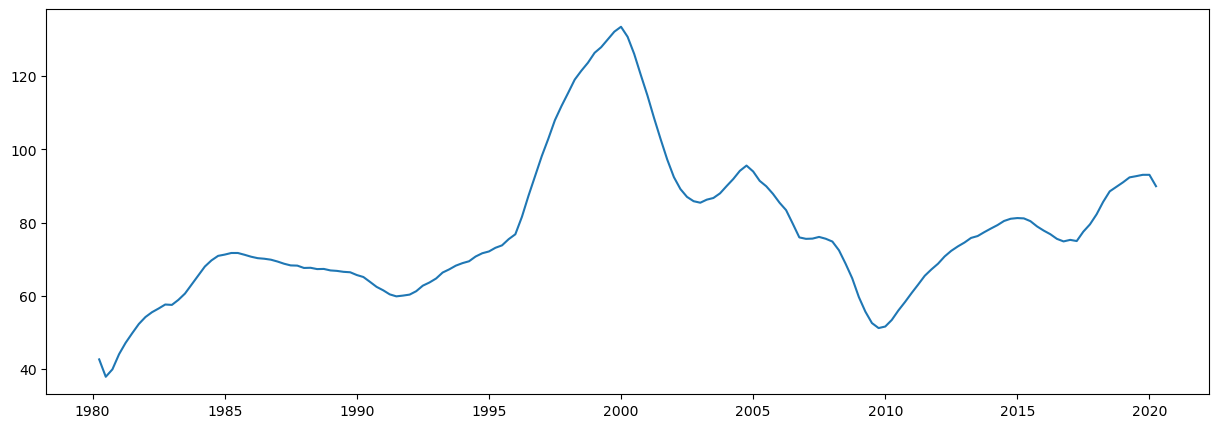

In [39]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [40]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.242815
p-value                          0.191075
Number of Lags Used              4.000000
Number of Observations Used    156.000000
Critical value (1%)             -3.472979
Critical value (5%)             -2.880252
Critical value (10%)            -2.576747
dtype: float64


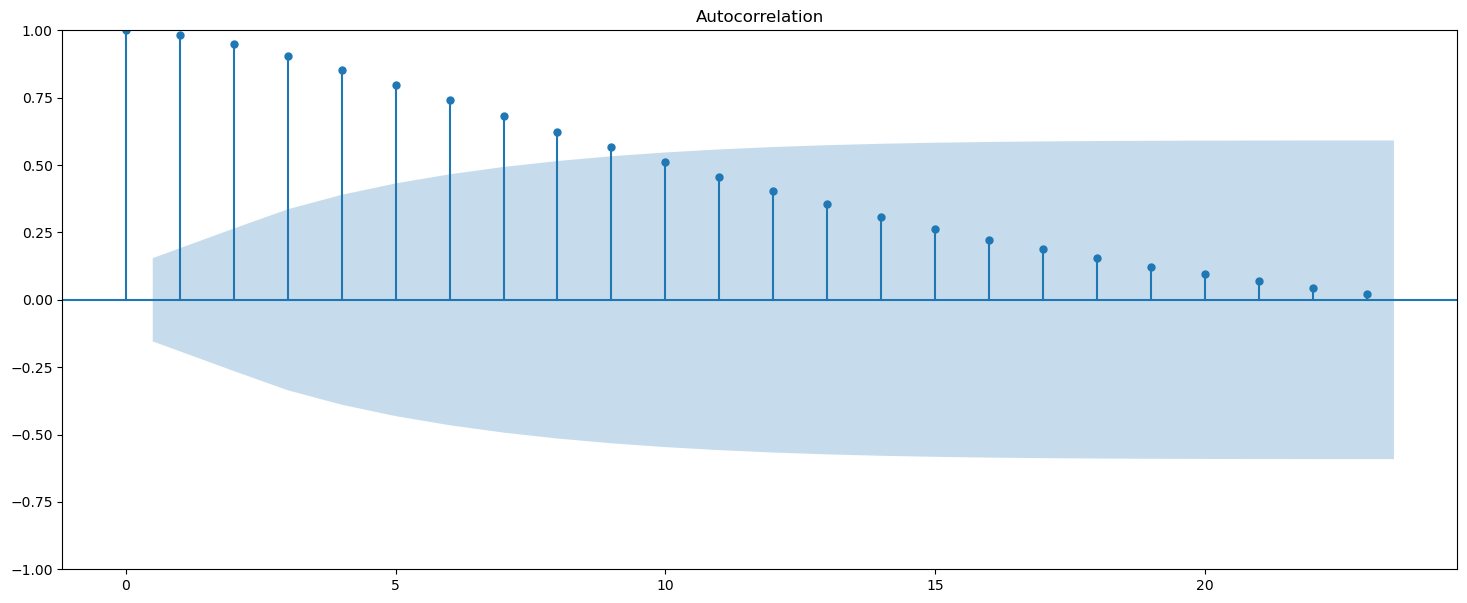

In [41]:
plot_acf(data_diff)
plt.show()